In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("../incl/")

import ELPH_utils
import ELPH_Scaler
import ELPH_Optimizer
import ELPH_Dim_Reducer
import ELPH_VAR_Transformer

from ELPH_RDNLVAR import RDNLVAR

In [8]:
runs = ELPH_utils.load_runs(filename='/home/agluedge/Preprints/ELPH/runs/runs_n_kmax=200.npz')

# runs = runs[::10]
# for k in range(len(runs)):
#     runs[k] = runs[k][:,::2]

n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)

1000 loaded with n_kmax = 200


In [10]:
model = RDNLVAR()

optimizer = ELPH_Optimizer.ridge(alpha=10.**-3.5)
scaler = ELPH_Scaler.normalize_scaler(0.1)
dim_reducer = ELPH_Dim_Reducer.SVD()
VAR_transformer = ELPH_VAR_Transformer.polynomial_features(order=2)

train_kwargs = {'rdim':20, 'prdim':20, 'n_VAR_steps':2, 'intercept':True, 'full_hist':False, 'optimizer':optimizer, 'scaler':scaler, 'dim_reducer':dim_reducer, 'VAR_transformer':VAR_transformer }

mean_scores_std, mean_scores_max, all_scores_std, all_scores_max = ELPH_utils.get_KFold_CV_scores_std_max(model, runs, folds=10, seed=817, train_kwargs=train_kwargs)

print(np.mean(mean_scores_std))
print(np.std(all_scores_std))
print('\n')
print(np.mean(mean_scores_max))
print(np.std(all_scores_max))

0.006301407495053644
0.00393118079468427


0.03138361624470426
0.022604387936276796


In [ ]:
model = RDNLVAR()

scaler = ELPH_Scaler.normalize_scaler(0.1)
dim_reducer = ELPH_Dim_Reducer.SVD()
VAR_transformer = ELPH_VAR_Transformer.polynomial_features(order=2)


# aExpAr = np.array([-4,-3.5,-3.0,-2.5])
aExpAr = np.linspace(-5,-1.0,25)

# rdimAr = np.array([5,15,20,25])
rdimAr = np.arange(5,50.5,1,dtype=int)

max_scores = np.zeros(rdimAr.size)
max_scores_std = np.zeros(rdimAr.size)

std_scores = np.zeros(rdimAr.size)
std_scores_std = np.zeros(rdimAr.size)

opt_aExp_std = np.zeros(rdimAr.size)
opt_aExp_max = np.zeros(rdimAr.size)

for n,rdim in enumerate(rdimAr):
    
    print('rdim:', rdim, ' ('+str(n+1)+'/'+str(rdimAr.size)+')')
    
    tmp_max_scores = np.zeros(aExpAr.size)
    tmp_max_scores_std = np.zeros(aExpAr.size)

    tmp_std_scores = np.zeros(aExpAr.size)
    tmp_std_scores_std = np.zeros(aExpAr.size)
    
    for m,aExp in enumerate(aExpAr):
        
        optimizer = ELPH_Optimizer.ridge(alpha=10.**aExp)
        
        train_kwargs = {'rdim':rdim, 'prdim':rdim, 'n_VAR_steps':2, 'intercept':True, 'full_hist':False, 'optimizer':optimizer, 'scaler':scaler, 'dim_reducer':dim_reducer, 'VAR_transformer':VAR_transformer }

        mean_scores_std, mean_scores_max, all_scores_std, all_scores_max = ELPH_utils.get_KFold_CV_scores_std_max(model, runs, folds=10, seed=817, train_kwargs=train_kwargs)
        
        tmp_max_scores[m] = np.mean(mean_scores_max)
        tmp_max_scores_std[m] = np.std(all_scores_max)

        tmp_std_scores[m] = np.mean(mean_scores_std)
        tmp_std_scores_std[m] = np.std(all_scores_std)
        
    
    ind_max = np.nanargmin( tmp_max_scores + tmp_max_scores_std )
    ind_std = np.nanargmin( tmp_std_scores + tmp_std_scores_std )
    
    max_scores[n] = tmp_max_scores[ind_max]
    max_scores_std[n] = tmp_max_scores_std[ind_max]
    
    std_scores[n] = tmp_std_scores[ind_std]
    std_scores_std[n] = tmp_std_scores_std[ind_std]
    
    opt_aExp_std[n] = aExpAr[ind_std]
    opt_aExp_max[n] = aExpAr[ind_max]
    


rdim: 5  (1/46)


/usr/lib/python3/dist-packages/numpy/core/numeric.py:909: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
../incl/ELPH_RDNLVAR.py:200: RuntimeWarning: invalid value encountered in matmul
  pred[:,j] = self.w.T @ transform
../incl/ELPH_RDNLVAR.py:222: RuntimeWarning: overflow encountered in square
  err = np.sqrt( np.mean( np.square(run-pred) ) )
../incl/ELPH_Scaler.py:68: RuntimeWarning: overflow encountered in multiply
  return ( ( (data_matrix.T + 0.5*self.rel_scale_vec[:n_features]) * self.scale[:n_features])+self.min[:n_features] ).T
../incl/ELPH_Dim_Reducer.py:33: RuntimeWarning: invalid value encountered in matmul
  return self.U[:,:dim] @ coef_matrix


rdim: 6  (2/46)
rdim: 7  (3/46)
rdim: 8  (4/46)
rdim: 9  (5/46)


../incl/ELPH_RDNLVAR.py:200: RuntimeWarning: overflow encountered in matmul
  pred[:,j] = self.w.T @ transform


rdim: 10  (6/46)
rdim: 11  (7/46)
rdim: 12  (8/46)
rdim: 13  (9/46)
rdim: 14  (10/46)
rdim: 15  (11/46)
rdim: 16  (12/46)
rdim: 17  (13/46)
rdim: 18  (14/46)
rdim: 19  (15/46)
rdim: 20  (16/46)
rdim: 21  (17/46)
rdim: 22  (18/46)
rdim: 23  (19/46)
rdim: 24  (20/46)
rdim: 25  (21/46)
rdim: 26  (22/46)
rdim: 27  (23/46)
rdim: 28  (24/46)
rdim: 29  (25/46)
rdim: 30  (26/46)
rdim: 31  (27/46)
rdim: 32  (28/46)
rdim: 33  (29/46)
rdim: 34  (30/46)
rdim: 35  (31/46)
rdim: 36  (32/46)
rdim: 37  (33/46)
rdim: 38  (34/46)
rdim: 39  (35/46)
rdim: 40  (36/46)
rdim: 41  (37/46)
rdim: 42  (38/46)
rdim: 43  (39/46)
rdim: 44  (40/46)
rdim: 45  (41/46)
rdim: 46  (42/46)
rdim: 47  (43/46)


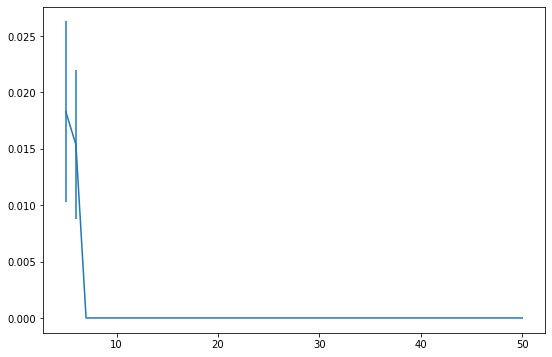

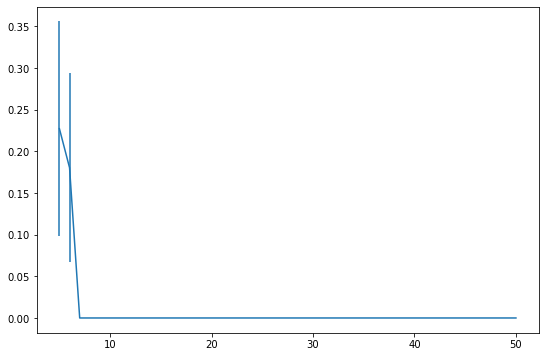

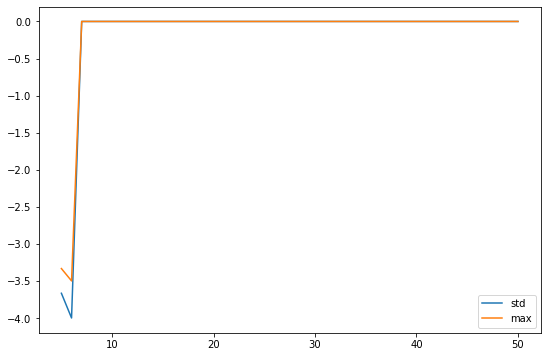

In [7]:
plt.errorbar(rdimAr, std_scores, yerr=std_scores_std)
plt.show()

plt.errorbar(rdimAr, max_scores, yerr=max_scores_std)
plt.show()

plt.plot(rdimAr, opt_aExp_std, label='std')
plt.plot(rdimAr, opt_aExp_max, label='max')
plt.legend()
plt.show()